In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from data_preprocessing.data_distribution import aggregate_data, create_uniform_distribution, min_max_scaling, \
    z_score_normalization, max_absolute_scaling
from data_preprocessing.train_test_split import train_test_split_data
from data_preprocessing.trigger_points import trigger_time_table
from data_training.KNN.knn_prediction import knn_classifier_all_channels
from main import init


ModuleNotFoundError: No module named 'dotenv'

 ### E-mail from Susan

In the attachment, you can find two data sets just to learn how to work with EEG data. First of all you need to upload it in the processing software (MATLAB, Python,…), then you will have a 2D matrix where  it is # time samples*#channels. You can use channel 1:12 while channel 13 is EMG to investigate movement onset. The sampling frequency was 1200 Hz. You should extract MRCPs by finding movement detection from EMGs. MRCP is mainly started 2 sec prior to movement onset.

# Notes

### short description of each column in the file, given minor investigation

    - '__header__' irrelevant
    - '__version__' irrelevant
    - '__globals__' might be variables in the .mat file
    - 'handle_arrow_rand' array of 1s and 2s
    - 'no_movements' holds integer 30
    - 'time_cue_on' formatted as a array of floats, its a date // 30 timestamps
    - 'time_cue_off' formatted as array of floats, its a date // 1219 timestamps
    - 'TriggerPoint' holds 61 timestamps
    - 'delay_T1' holds a constant 3
    - 'delay_random_T1' holds a constant 2
    - 'delay_T2' holds a constant 0.1
    - 'sample_rate' holds a constant 1200
    - 'time_window' holds a constant 3
    - 'no_time_windows' holds a constant 1000
    - 'filter_code_eeg' holds a constant 38 (could refer to what type of filter e.g. butterworth?)
    - 'time_start_device1' holds timestamp for when recording began
    - 'time_after_first_window' holds timestamp
    - 'time_after_last_window' holds timestamp
    - 'time_stop_device1' holds timestamp of when recording ended
    - 'data_device1' dataframe of 16 columns -  size 405824x16 for cue_set1 and 446912x16 for cue_set2
    - 'time_axis_all_device1' potentially holds timestamps from recording start? has 1x402224 and 1x443312 shape for cue_set1 and cue_set2 respectively. (number of indices almost line up with data_device1)

In [22]:
data = init(selected_cue_set=0)

### Data Investigation

In [23]:
data.data_device1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000258,0.000272,0.000064,0.000609,0.000055,0.000257,-0.000007,-0.000099,-0.000308,0.000339,0.000280,0.000032,0.000079,0.000185,0.000011,0.000299
1,0.052644,0.007779,-0.013178,-0.011900,-0.009890,0.004895,-0.011826,-0.014831,-0.051013,0.052730,0.143087,0.052914,-0.034878,-0.053215,-0.020476,0.021011
2,-0.018937,-0.006850,-0.014828,-0.012735,-0.016893,-0.011796,-0.016083,-0.008713,-0.001338,-0.008554,0.177096,0.185288,0.006653,-0.047167,-0.014965,-0.040797
3,-0.017449,-0.009423,-0.020752,-0.019010,-0.024620,-0.015835,-0.023497,-0.013807,-0.008897,-0.002519,0.246563,0.245063,-0.026257,-0.035837,-0.030295,-0.040202
4,-0.019193,-0.009692,-0.021968,-0.019929,-0.025658,-0.016586,-0.024548,-0.014334,-0.008702,-0.003762,0.260248,0.259745,-0.043538,-0.024397,-0.029768,-0.046494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405819,-0.017999,-0.009966,-0.018244,-0.020071,-0.026619,-0.016393,-0.022933,-0.012371,-0.009561,-0.004790,0.247545,0.247177,0.058031,-0.138931,0.000381,-0.088700
405820,-0.018010,-0.009973,-0.018249,-0.020080,-0.026629,-0.016405,-0.022943,-0.012383,-0.009570,-0.004801,0.247942,0.247574,0.048608,-0.129188,-0.002052,-0.085681
405821,-0.018020,-0.009980,-0.018257,-0.020077,-0.026634,-0.016416,-0.022952,-0.012391,-0.009573,-0.004793,0.249757,0.249391,0.036568,-0.112828,-0.007677,-0.077072
405822,-0.018037,-0.009989,-0.018272,-0.020077,-0.026638,-0.016420,-0.022953,-0.012395,-0.009573,-0.004794,0.251253,0.250888,0.019876,-0.093358,-0.013501,-0.069212


<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

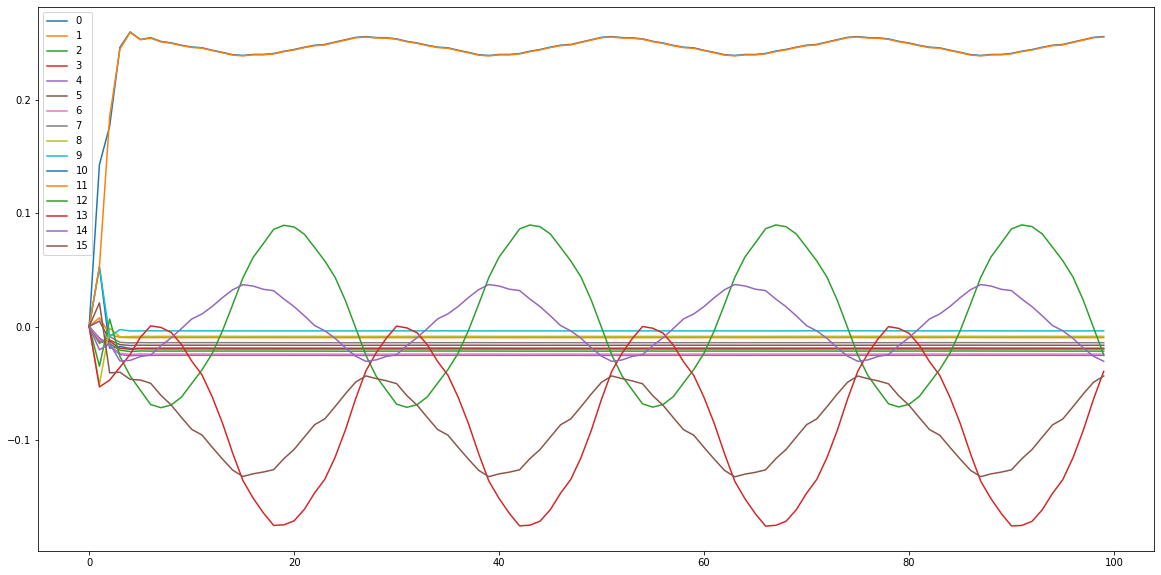

In [24]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
data.data_device1.iloc[:100].plot()

<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

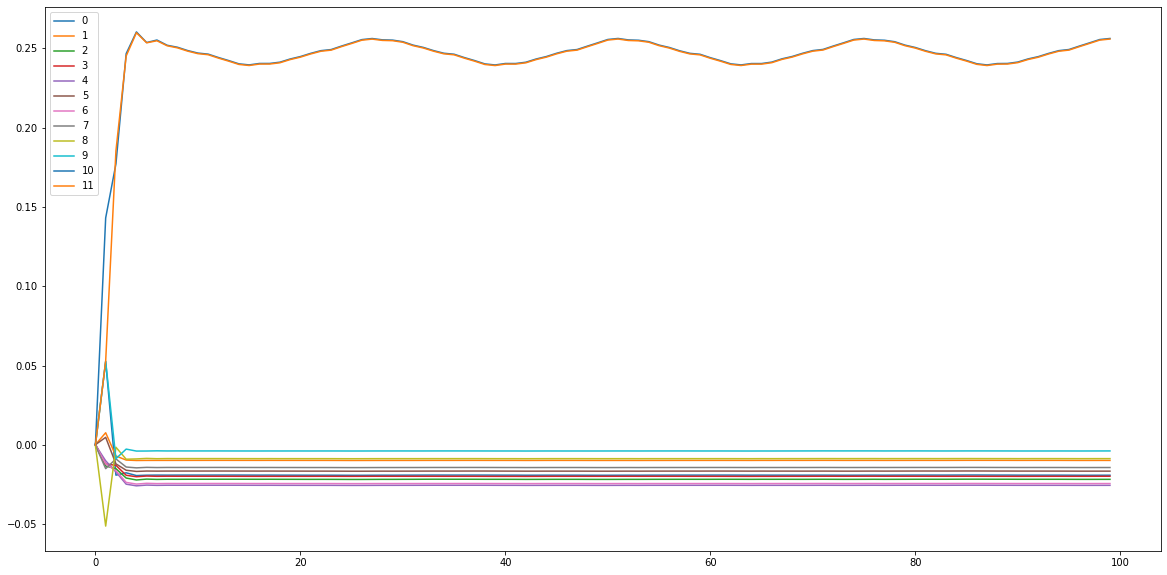

In [25]:
plt.figure()
data.data_device1.iloc[:100,:12].plot()

<AxesSubplot:>

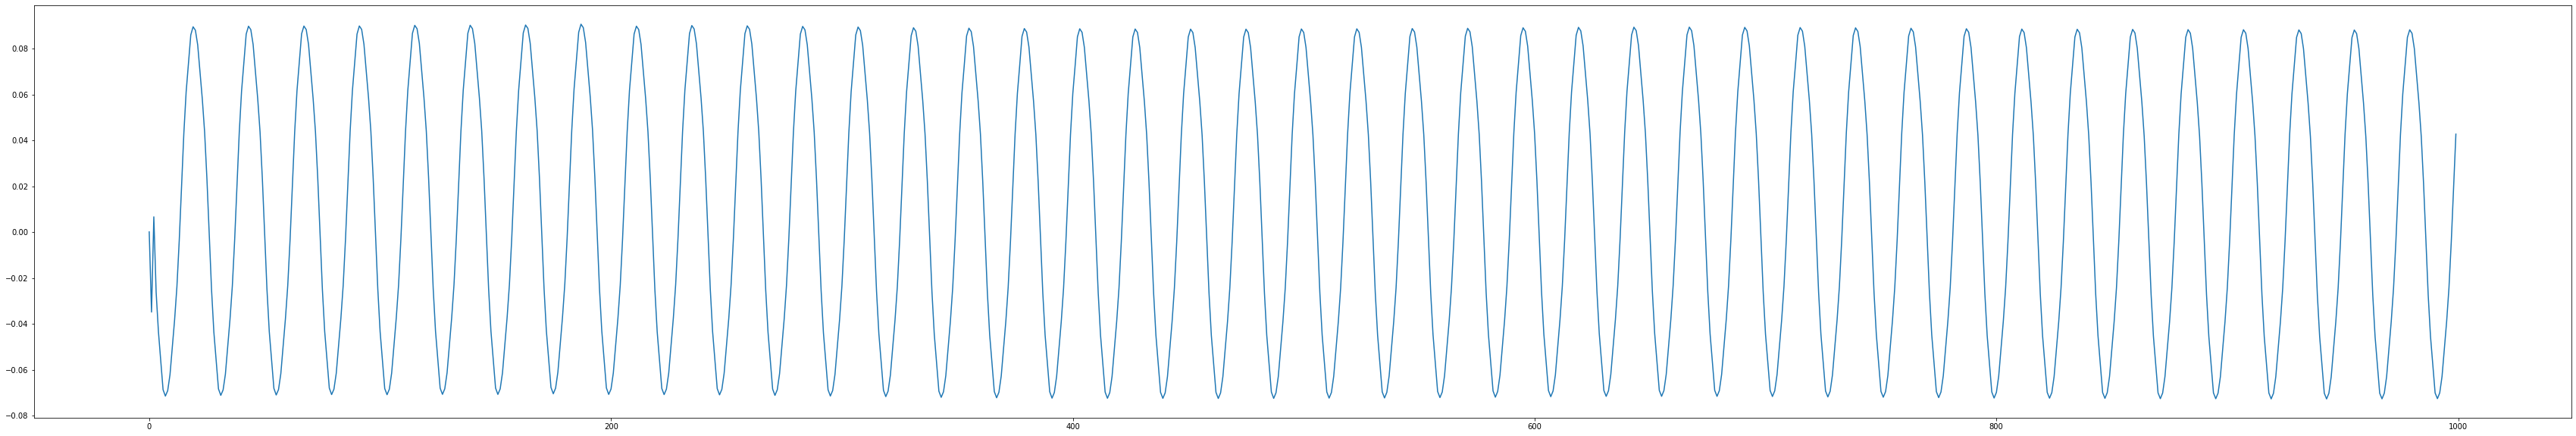

In [26]:
plt.rcParams['figure.figsize'] = [60, 10]
plt.figure()
data.data_device1.iloc[:1000,12].plot()

In [27]:
data.TriggerPoint

,Trigger,Date
0,0,2017-10-24 13:24:49.137
1,1,2017-10-24 13:25:27.398
2,0,2017-10-24 13:25:29.733
3,1,2017-10-24 13:25:38.909
4,0,2017-10-24 13:25:41.223
...,...,...
56,0,2017-10-24 13:30:12.672
57,1,2017-10-24 13:30:20.826
58,0,2017-10-24 13:30:23.061
59,1,2017-10-24 13:30:31.412


In [28]:
trigger_table = trigger_time_table(data.TriggerPoint, data.time_start_device1)
trigger_table

,start,end
0,0 days 00:00:26.317000,0 days 00:00:28.652000
1,0 days 00:00:37.828000,0 days 00:00:40.142000
2,0 days 00:00:49.302000,0 days 00:00:50.978000
3,0 days 00:00:59.727000,0 days 00:01:01.925000
4,0 days 00:01:10.245000,0 days 00:01:12.607000
5,0 days 00:01:20.607000,0 days 00:01:22.957000
6,0 days 00:01:32.033000,0 days 00:01:34.408000
7,0 days 00:01:42.474000,0 days 00:01:44.797000
8,0 days 00:01:51.956000,0 days 00:01:54.573000
9,0 days 00:02:03.390000,0 days 00:02:05.631000


In [29]:
start = trigger_table['start'].iloc[0]
trigger_01 = int((start.seconds + 0.37) * data.sample_rate)

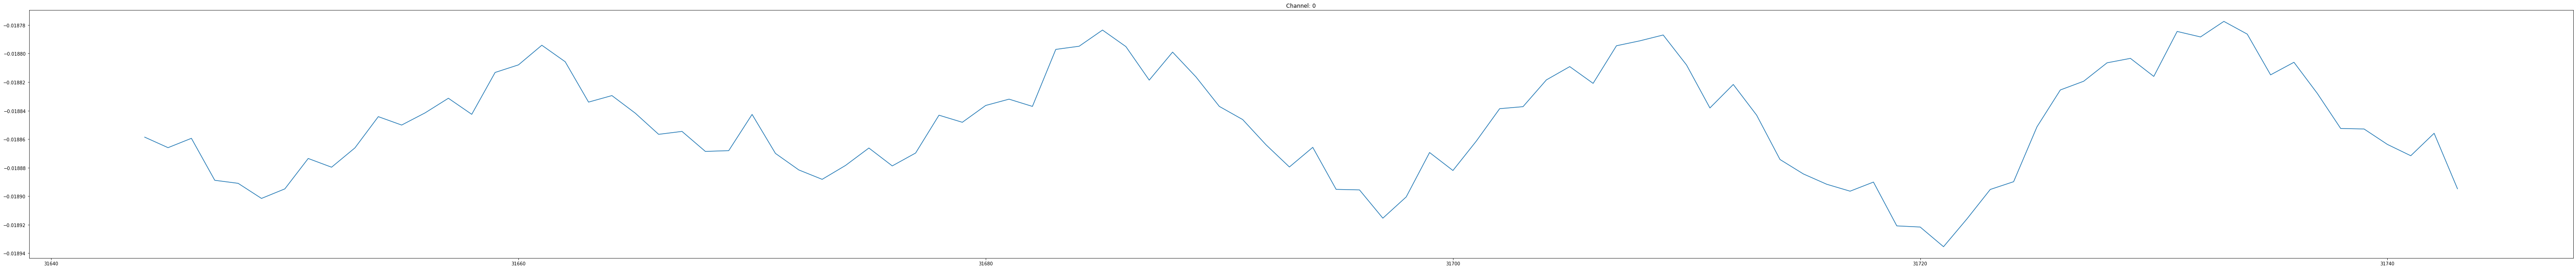

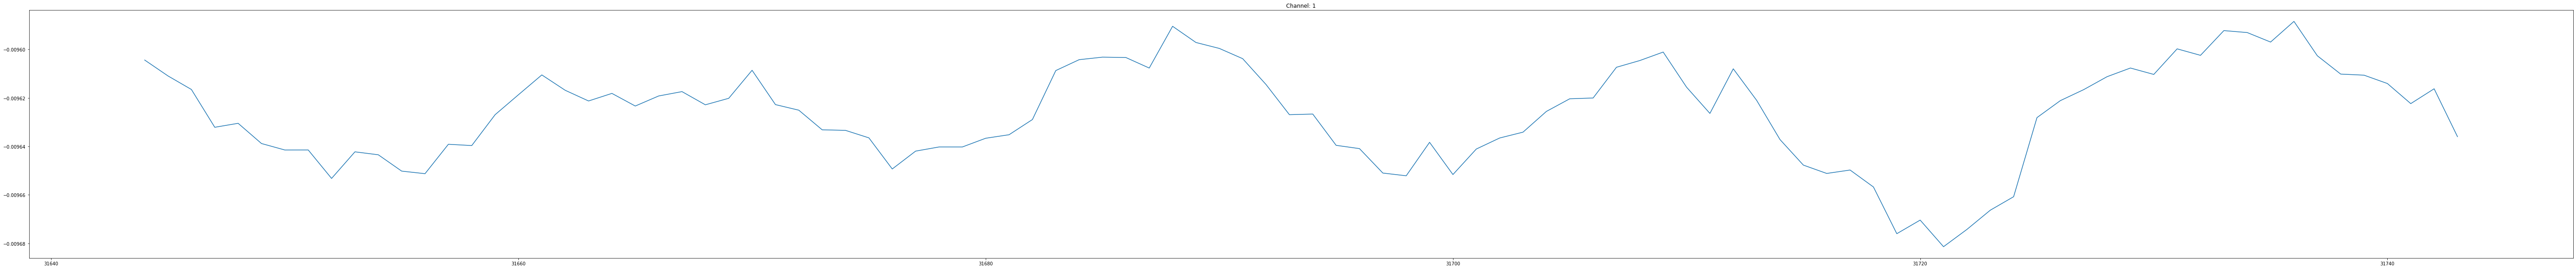

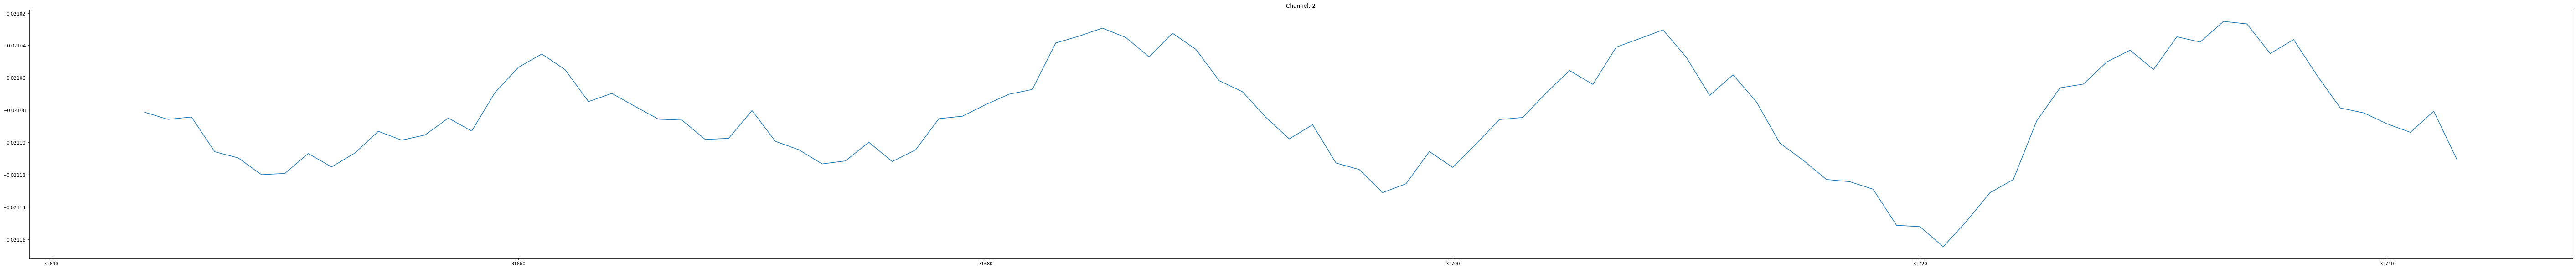

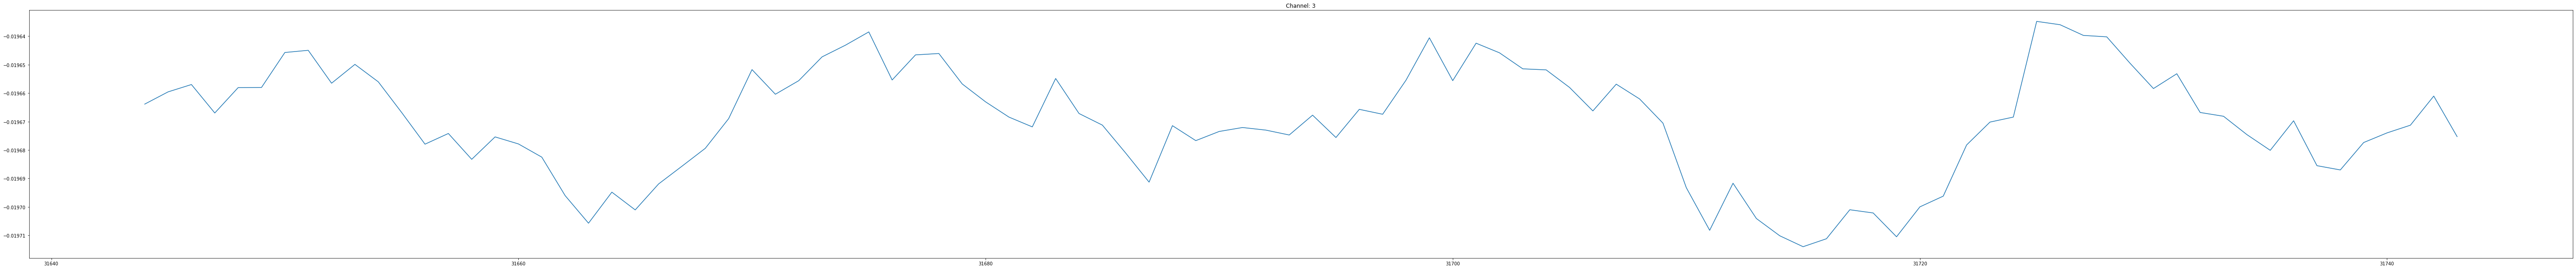

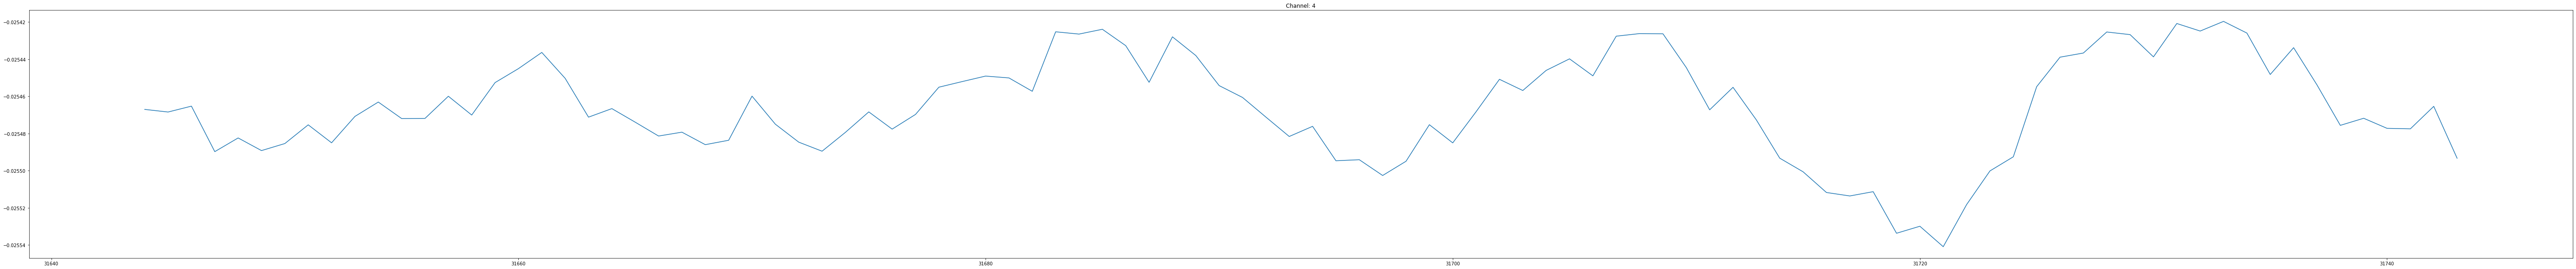

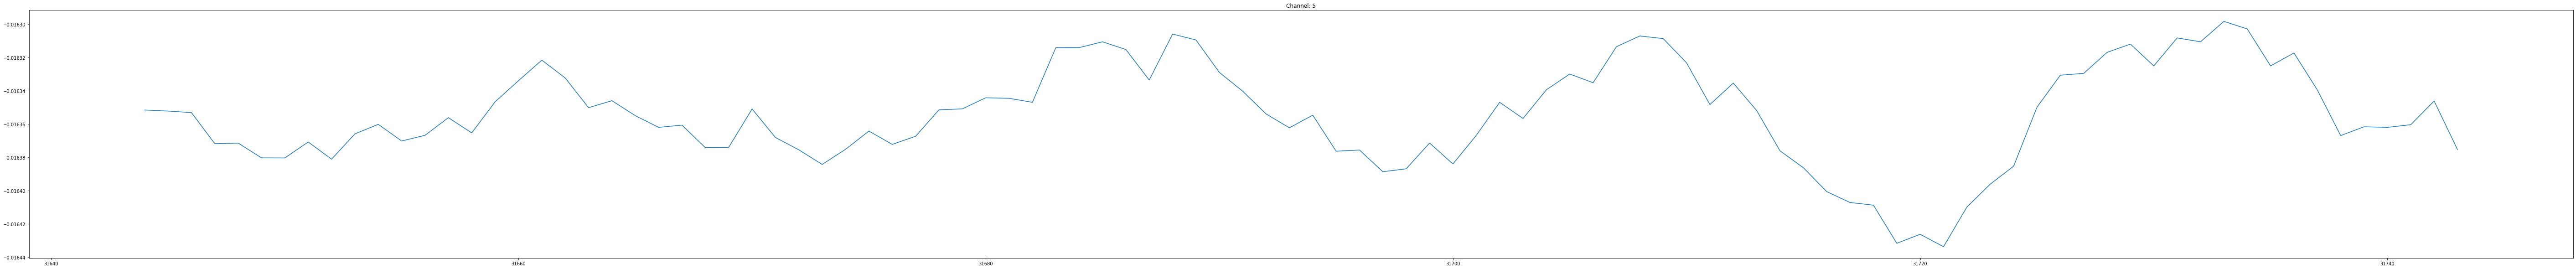

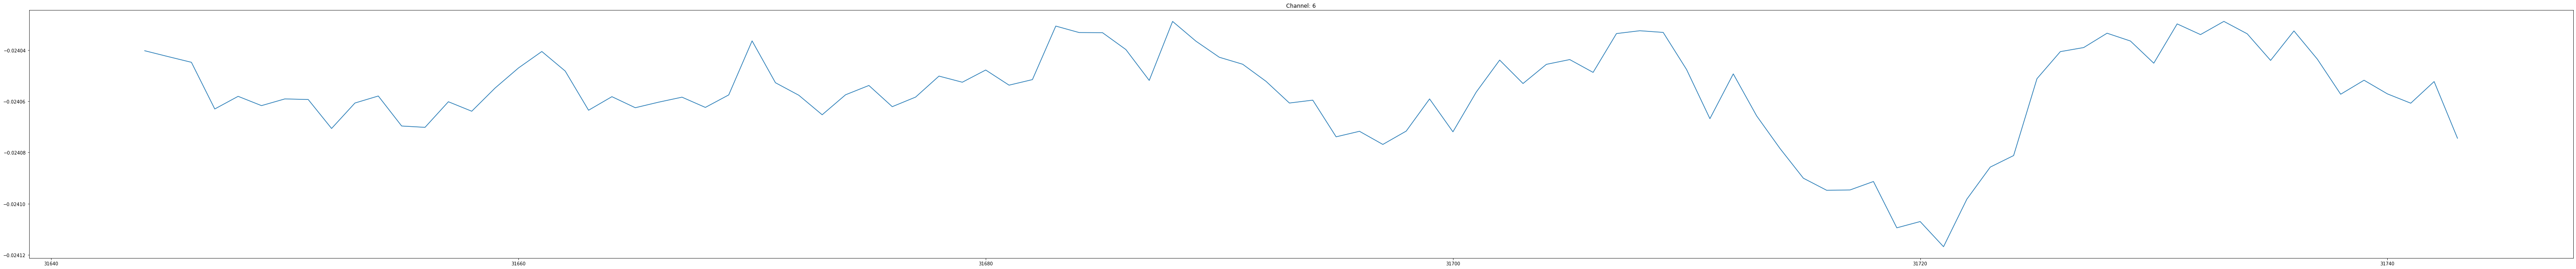

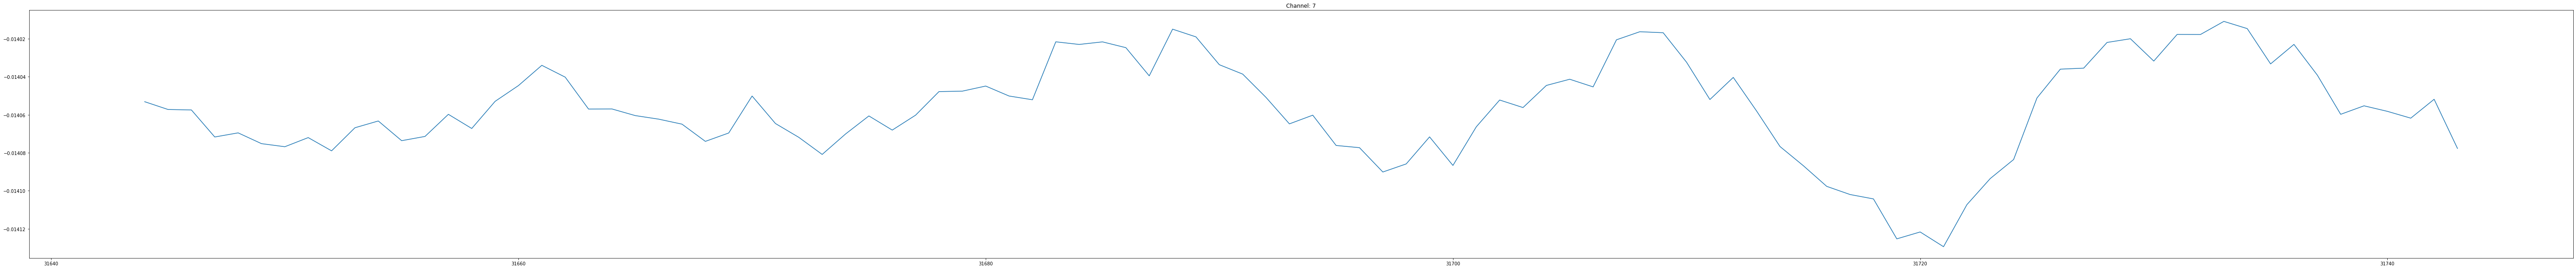

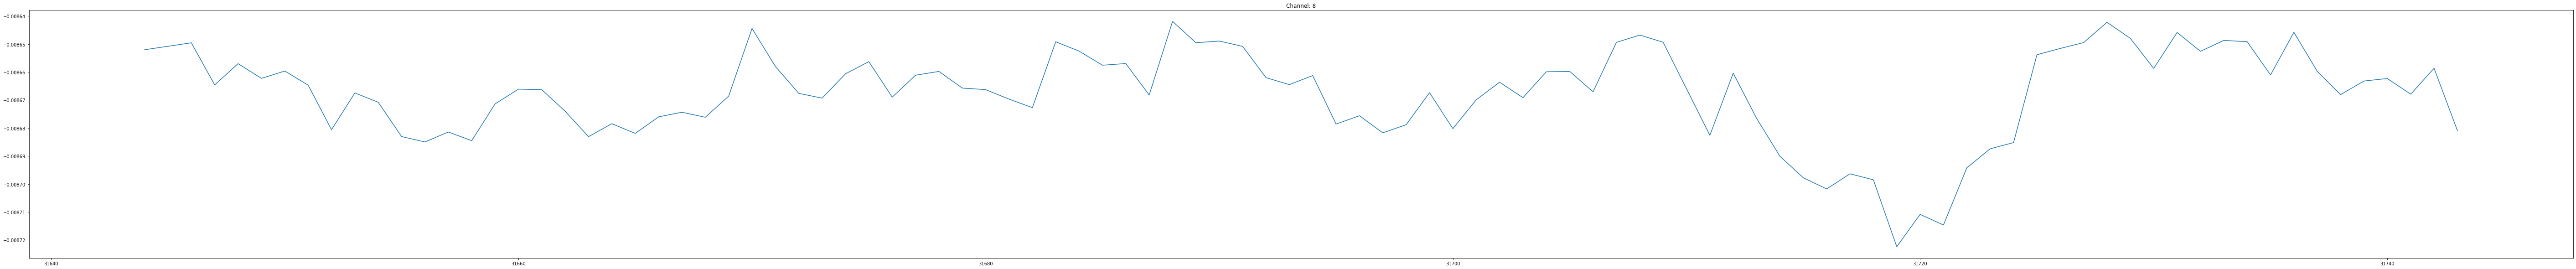

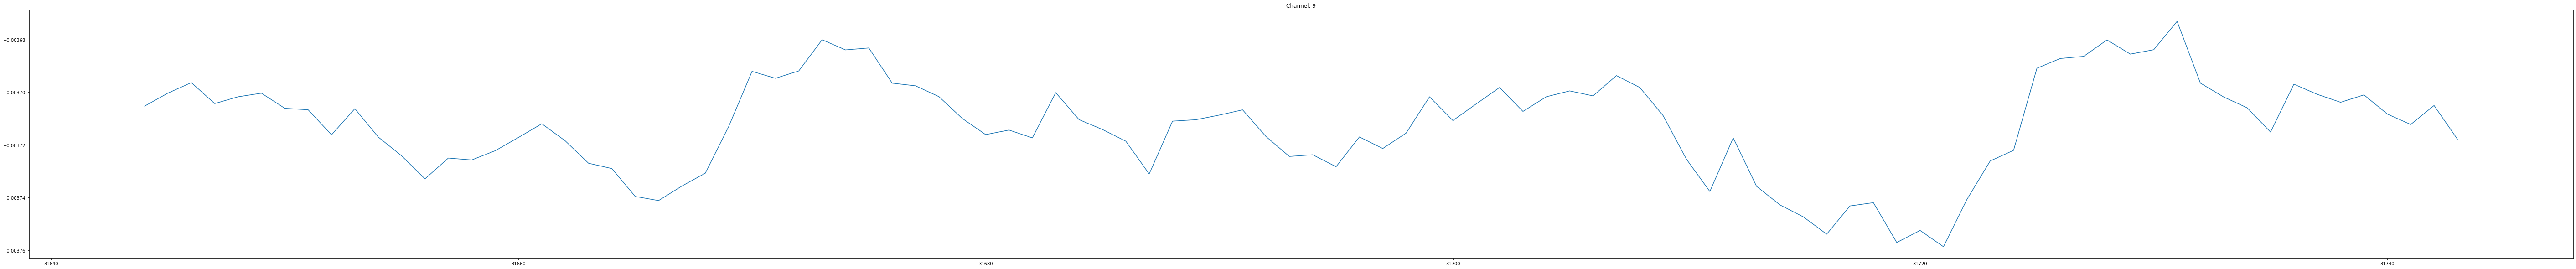

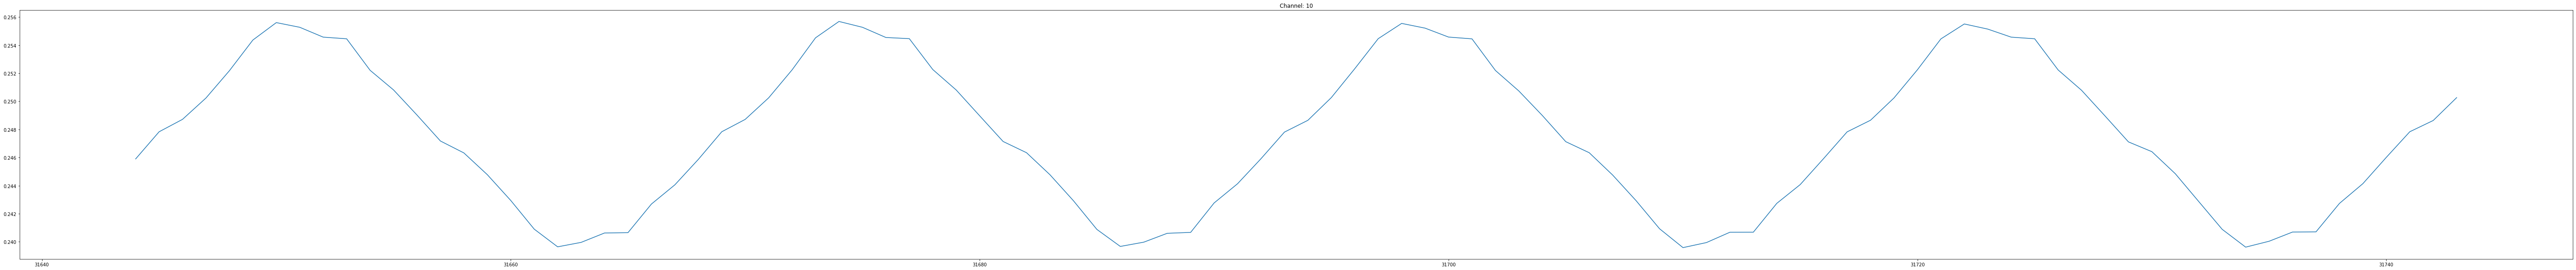

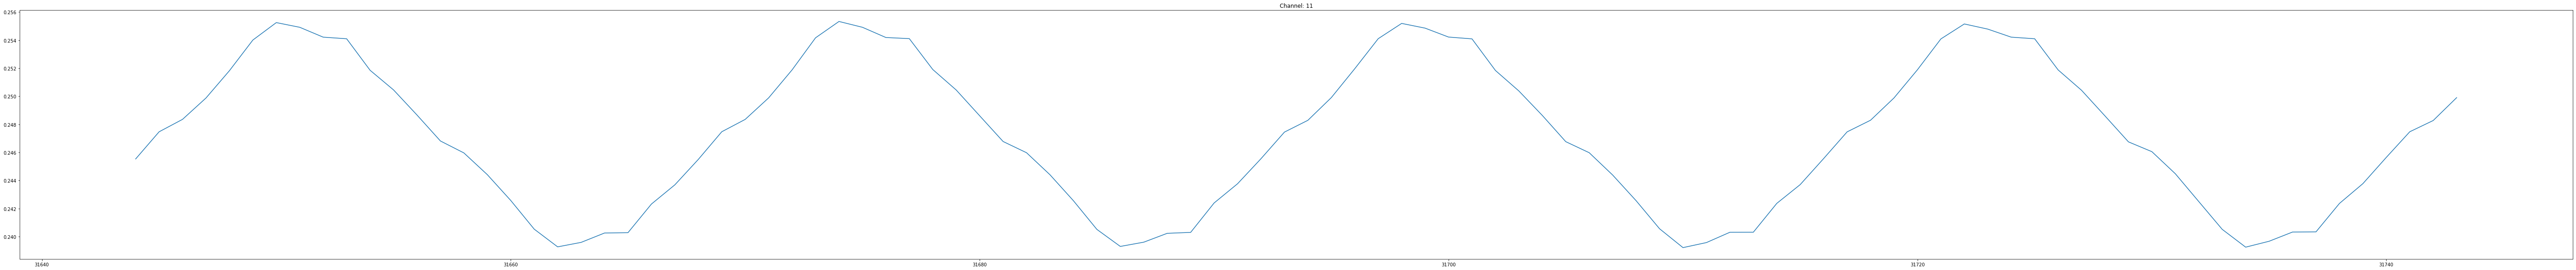

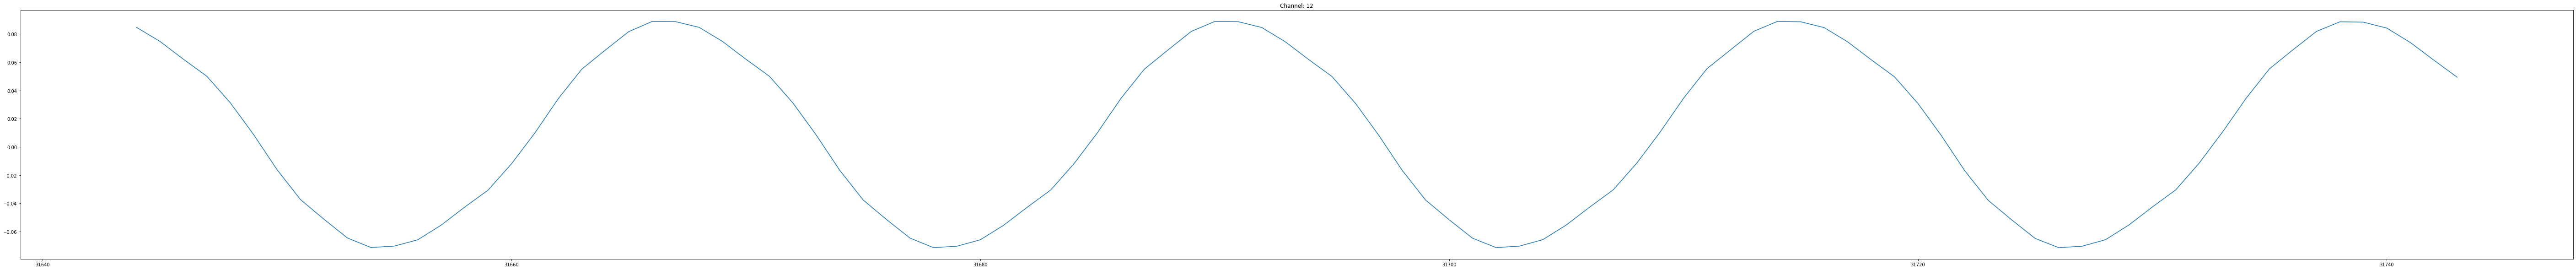

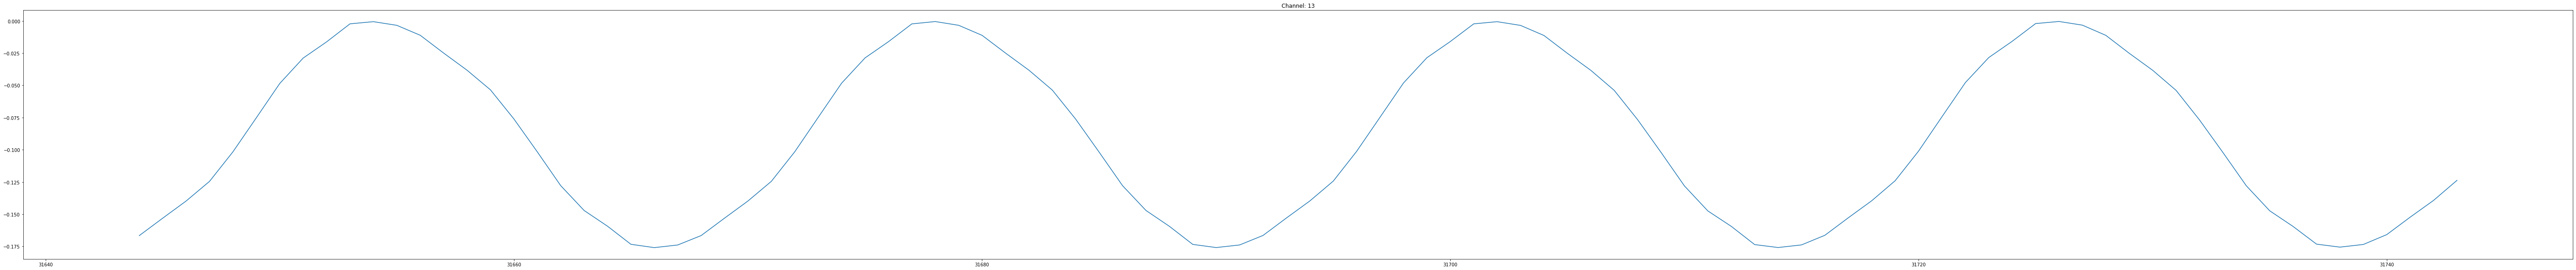

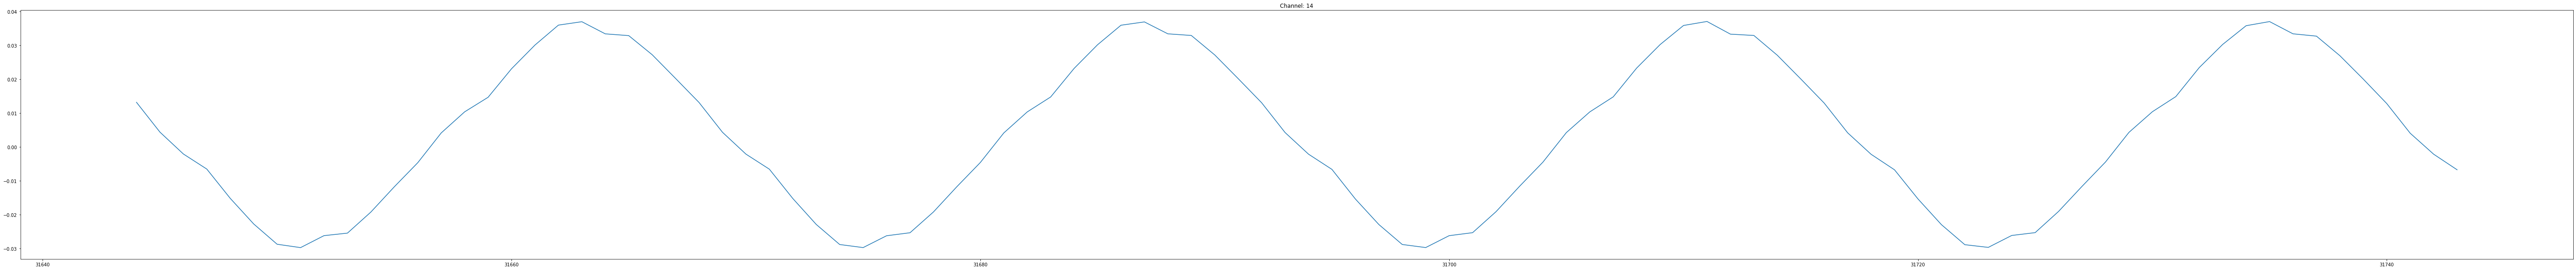

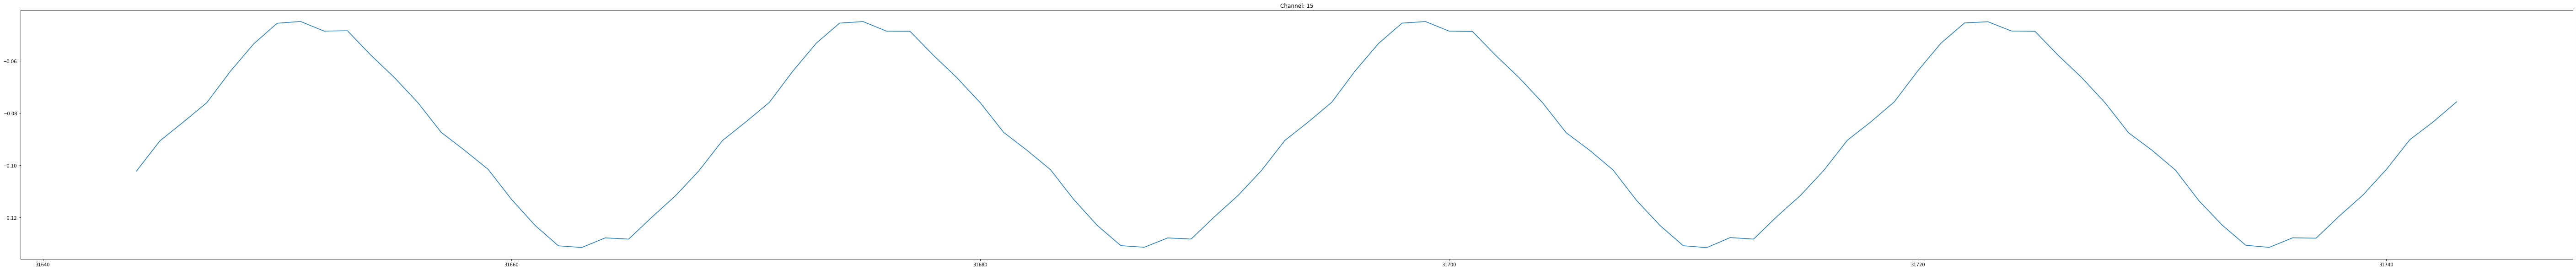

In [30]:
plt.rcParams['figure.figsize'] = [100, 10]
for column in data.data_device1:
    plt.figure()
    plt.title(f'Channel: {column}')
    data.data_device1[column].iloc[trigger_01: trigger_01+100].plot()

### Uncertain elements

In [31]:
data.delay_T1

3

In [32]:
data.delay_random_T1

2

In [33]:
data.delay_T2

0.1

In [34]:
1 / data.sample_rate

0.0008333333333333334

In [35]:
data.time_axis_all_device1

,0,1,2,3,4,5,6,7,8,9,...,402214,402215,402216,402217,402218,402219,402220,402221,402222,402223
0,3.0,3.000833,3.001667,3.0025,3.003333,3.004167,3.005,3.005833,3.006667,3.0075,...,338.178333,338.179167,338.18,338.180833,338.181667,338.1825,338.183333,338.184167,338.185,338.185833


#### Filters 

In [36]:
data.filter_code_eeg

38

### Labelling the Data

In [37]:
labelled_data = aggregate_data(data.data_device1, 100, trigger_table, sample_rate=data.sample_rate)
labelled_data[0].data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000258,0.000272,0.000064,0.000609,0.000055,0.000257,-0.000007,-0.000099,-0.000308,0.000339,0.000280,0.000032,0.000079,0.000185,0.000011,0.000299
1,0.052644,0.007779,-0.013178,-0.011900,-0.009890,0.004895,-0.011826,-0.014831,-0.051013,0.052730,0.143087,0.052914,-0.034878,-0.053215,-0.020476,0.021011
2,-0.018937,-0.006850,-0.014828,-0.012735,-0.016893,-0.011796,-0.016083,-0.008713,-0.001338,-0.008554,0.177096,0.185288,0.006653,-0.047167,-0.014965,-0.040797
3,-0.017449,-0.009423,-0.020752,-0.019010,-0.024620,-0.015835,-0.023497,-0.013807,-0.008897,-0.002519,0.246563,0.245063,-0.026257,-0.035837,-0.030295,-0.040202
4,-0.019193,-0.009692,-0.021968,-0.019929,-0.025658,-0.016586,-0.024548,-0.014334,-0.008702,-0.003762,0.260248,0.259745,-0.043538,-0.024397,-0.029768,-0.046494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.018954,-0.009638,-0.021555,-0.019659,-0.025339,-0.016392,-0.024215,-0.014122,-0.008525,-0.003702,0.249161,0.248792,0.058320,-0.135141,-0.003585,-0.081566
96,-0.018985,-0.009651,-0.021577,-0.019662,-0.025356,-0.016414,-0.024226,-0.014138,-0.008537,-0.003712,0.251298,0.250932,0.043919,-0.115725,-0.010291,-0.070660
97,-0.018997,-0.009651,-0.021579,-0.019654,-0.025359,-0.016412,-0.024229,-0.014135,-0.008528,-0.003703,0.253347,0.252984,0.023438,-0.091666,-0.018673,-0.059407
98,-0.018987,-0.009644,-0.021568,-0.019634,-0.025348,-0.016404,-0.024217,-0.014125,-0.008517,-0.003688,0.255451,0.255089,-0.000705,-0.064091,-0.026083,-0.049107


 ### Normalization and scaling techniques

In [38]:
# data.data_device1 = z_score_normalization(data.data_device1)
# data.data_device1 = max_absolute_scaling(data.data_device1)
data.data_device1 = min_max_scaling(data.data_device1)

 #### Uniform data samples - dataset consisting of equally many 'triggered' and 'idle' labels

In [39]:
uniform_data = create_uniform_distribution(labelled_data)

 ### Training

In [40]:
train_data, test_data = train_test_split_data(uniform_data, split_per=20)

score = knn_classifier_all_channels(train_data, test_data)

score

The Train and Test Data has an acceptable triggered distribution of 50 and 47 percent - Returning.


,0,1,2,3,4,5,6,7,8,9,10,11,ensemble
train_score,0.840030,0.792411,0.848958,0.808780,0.843006,0.768601,0.817708,0.831101,0.857143,0.785714,0.815476,0.816220,85.565476
test_score,0.633929,0.547619,0.622024,0.553571,0.595238,0.574405,0.580357,0.604167,0.595238,0.538690,0.616071,0.616071,62.797619
